# Расчет плавного изменения напора с шагом 1м.

## Подключение библиотек

In [1]:
from nrs import NRS_Model, Element, NRS_Revision, NRS_Observer_E    # классы НРС
from nrs import NRS_Data as nd                                      # Табличные данные НРС
from nrs import q_out_simple, q_out_nozzle                          # модели расчета параметров
import matplotlib.pyplot as plt                                     # библиотеки для отрисовки получаемых данных

## Модель НРС
![модель НРС](nrs_1.jpg)
Схема НРС состоит из:
* 1 источника в виде насоса ПА
* 2 магистральных рукавных линий
* 2 рукавных разветвлений
* 5 рабочих рукавных линий
* 5 приборов подачи воды

### Модель 1
* Источник (Насос): АЦ-40
* Магистральная рукавная линия (МРЛ Н-Р1): 3 пожарные напорные рукава диаметром 77мм
* Магистральная рукавная линия (МРЛ Р1-Р2): 3 пожарные напорные рукава диаметром 77мм
* Рукавное разветвление (Р1): Стандартное
* Рабочая рукавная линия (РРЛ Р1-Ств1): 3 пожарные напорные рукава диаметром 51мм
* Ствол 1 (Ств1): Ручной ствол "Б"
* Рабочая рукавная линия (РРЛ Р1-Ств2): 1 пожарные напорные рукава диаметром 51мм
* Ствол 2 (Ств2): Ручной ствол "Б"
* Рукавное разветвление (Р2): Стандартное
* Рабочая рукавная линия (РРЛ Р2-Ств3): 1 пожарные напорные рукава диаметром 51мм
* Ствол 3 (Ств3): Ручной ствол "Б"
* Рабочая рукавная линия (РРЛ Р2-Ств4): 1 пожарные напорные рукава диаметром 77мм
* Ствол 4 (Ств4): Ручной ствол "А"
* Рабочая рукавная линия (РРЛ Р2-Ств5): 3 пожарные напорные рукава диаметром 51мм
* Ствол 5 (Ств5): Ручной ствол "Б"

# Эксперименты

## Эксперимент 1-1
Модель: Модель 1
Условия:
* Стартовый напор на насосе - 20м
* На каждой итерации напор увеличивается на 1м
* По достижении напора 100м дополнительно производится 20 итераций расчета для фиксации результата

In [2]:
# Создаем модель НРС
model = NRS_Model('Модель от одного насоса к пяти стволам через два разветвления')

# Создаем элементы модели
pump = Element('Н1', 0, H_add=20)
hoseM_1 = Element('МРЛ Н-Р1', 1, s=nd.ss["77"], n=3)

splitter_1 = Element('Р1', 1)
hoseW_11 = Element('РРЛ Р1-1', 1, s=nd.ss["51"], n=3)
nozzle_11 = Element('Ствол Р1-1(Б)', 2, p=0.585, q_out = q_out_nozzle)
hoseW_12 = Element('РРЛ Р1-2', 1, s=nd.ss["51"], n=1)
nozzle_12 = Element('Ствол Р1-2(Б)', 2, p=0.585, q_out = q_out_nozzle)
hoseM_12 = Element('МРЛ Р1-Р2', 1, s=nd.ss["77"], n=3)

splitter_2 = Element('Р2', 1)
hoseW_21 = Element('РРЛ Р2-1', 1, s=nd.ss["51"], n=1)
nozzle_21 = Element('Ствол Р2-1(Б)', 2, p=0.585, q_out = q_out_nozzle)
hoseW_22 = Element('РРЛ Р2-2', 1, s=nd.ss["77"], n=1)
nozzle_22 = Element('Ствол Р2-2(А)', 2, p=1.17, q_out = q_out_nozzle)
hoseW_23 = Element('РРЛ Р2-3', 1, s=nd.ss["51"], n=3)
nozzle_23 = Element('Ствол Р2-3(Б)', 2, p=0.585, q_out = q_out_nozzle)

# Соединяем элементы модели вместе в НРС
pump.append(hoseM_1).append(splitter_1).append(hoseM_12).append(splitter_2)

splitter_1.append(hoseW_11).append(nozzle_11)   # Рукавная линия к стволу №1
splitter_1.append(hoseW_12).append(nozzle_12)   # Рукавная линия к стволу №2

splitter_2.append(hoseW_21).append(nozzle_21)   # Рукавная линия к стволу №3
splitter_2.append(hoseW_22).append(nozzle_22)   # Рукавная линия к стволу №4
splitter_2.append(hoseW_23).append(nozzle_23)   # Рукавная линия к стволу №5

# Добавляем обозревателей
NRS_Observer_E(pump, ['q', 'H_in'])
NRS_Observer_E(nozzle_11, ['q', 'H_in'])
NRS_Observer_E(nozzle_12, ['q', 'H_in'])
NRS_Observer_E(nozzle_21, ['q', 'H_in'])
NRS_Observer_E(nozzle_22, ['q', 'H_in'])
NRS_Observer_E(nozzle_23, ['q', 'H_in'])

# Строим модель и инициируем обозревателей
model.build(pump, interpretate=True)
model.observersInit()

Новая модель: Модель от одного насоса к пяти стволам через два разветвления
Новый элемент НРС: Н1
Новый элемент НРС: МРЛ Н-Р1
Новый элемент НРС: Р1
Новый элемент НРС: РРЛ Р1-1
Новый элемент НРС: Ствол Р1-1(Б)
Новый элемент НРС: РРЛ Р1-2
Новый элемент НРС: Ствол Р1-2(Б)
Новый элемент НРС: МРЛ Р1-Р2
Новый элемент НРС: Р2
Новый элемент НРС: РРЛ Р2-1
Новый элемент НРС: Ствол Р2-1(Б)
Новый элемент НРС: РРЛ Р2-2
Новый элемент НРС: Ствол Р2-2(А)
Новый элемент НРС: РРЛ Р2-3
Новый элемент НРС: Ствол Р2-3(Б)


In [3]:
# Печать описания модели
NRS_Revision.print_model_elements(model)

all:
  Н1
  МРЛ Н-Р1
  Р1
  МРЛ Р1-Р2
  Р2
  РРЛ Р2-1
  Ствол Р2-1(Б)
  РРЛ Р2-2
  Ствол Р2-2(А)
  РРЛ Р2-3
  Ствол Р2-3(Б)
  РРЛ Р1-1
  Ствол Р1-1(Б)
  РРЛ Р1-2
  Ствол Р1-2(Б)
in:
  Н1
out:
  Ствол Р2-1(Б)
  Ствол Р2-2(А)
  Ствол Р2-3(Б)
  Ствол Р1-1(Б)
  Ствол Р1-2(Б)


In [6]:
# Предварительный прогон - для приведения НРС в стационарное (или исходное) состояние
pump.H_add=20                            # Расчетный напор

dbg=False                               # Флаг вывода отладочной информации
prevIterations=50

for i in range(prevIterations):
    if dbg:
        print(str(i) + "="*10 )
        print('===Qобщ=' + str(pump.q) + 'л/с')

    # Расчет модели
    model.calc()

print('=== Qобщ=' + str(model.summaryQ()) + 'л/с')
# Инициация (Обнуление) обозревателей
model.observersInit()

=== Qобщ=11.775542829236354л/с


In [7]:
model.summaryQ()

11.775542829236354

In [8]:
NRS_Revision.print_element_state(pump)

elements_next: [<nrs.Element object at 0x0000021CC35DC940>]
elements_previous: []
type: 0
name: Н1
q: 11.775542829236354
s: 0
H_in: 0
h: 0.0
z: 0
p: 1
n: 1
q_out: <function q_out_simple at 0x0000021CC14E4280>
H_add: 20
observer: <nrs.NRS_Observer_E object at 0x0000021CC35EC460>
H_out: 20.0


In [5]:
# Следует доработать!!!
# # Более короткий вариант приведения в стационарное состояние
# pump.H_add=40
# model.calc(accuracy=0.05)
# print('=== Qобщ=' + str(model.summaryQ()) + 'л/с')
# # Инициация (Обнуление) обозревателей
# # model.observersInit()

=== Qобщ=0.0л/с


In [9]:
# Проведение эксперимента
# Основные итерации
iteration=0                             # Индекс итерации
iterationCount=80                       # Количество итераций основного эксперимента
iterationPostCount=20                   # Количество итераций после эксперимента, для фиксации данных
dbg=False                               # Флаг вывода отладочной информации
pressures=[]                            # Список напоров

for i in range(iterationCount+iterationPostCount):
    if dbg:
        print(str(iteration) + "="*10 )
        print('=== Qобщ=' + str(pump.q) + 'л/с')
    
    iteration+=1
    pressures.append(pump.H_in)

    # Расчет модели
    if iteration <= iterationCount:
        pump.H_in+=1
    model.calc()
    print('===Qобщ=' + str(pump.q) + 'л/с')

===Qобщ=12.288555747376568л/с
===Qобщ=12.393122063119547л/с
===Qобщ=12.807812207170734л/с
===Qобщ=12.966431030988105л/с
===Qобщ=13.31777355499749л/с
===Qобщ=13.506823554486056л/с
===Qобщ=13.815712859726624л/с
===Qобщ=14.020995674264288л/с
===Qобщ=14.300614549582017л/с
===Qобщ=14.513544103807103л/с
===Qобщ=14.772326044010992л/с
===Qобщ=14.987746924866213л/с
===Qобщ=15.231161147554094л/с
===Qобщ=15.446021512246135л/с
===Qобщ=15.677670734036486л/с
===Qобщ=15.890208876662761л/с
===Qобщ=16.112510349138404л/с
===Qобщ=16.32175408209038л/с
===Qобщ=16.536365198459208л/с
===Qобщ=16.74182293364892л/с
===Qобщ=16.949909024631296л/с
===Qобщ=17.151378902884062л/с
===Qобщ=17.353782866592873л/с
===Qобщ=17.551234854448296л/с
===Qобщ=17.748585349574235л/с
===Qобщ=17.942088562036346л/с
===Qобщ=18.13486953307218л/с
===Qобщ=18.324547635913113л/с
===Qобщ=18.513143367071866л/с
===Qобщ=18.699147423634592л/с
===Qобщ=18.883872019665333л/с
===Qобщ=19.06636416804986л/с
===Qобщ=19.247481066332846л/с
===Qобщ=19.4266

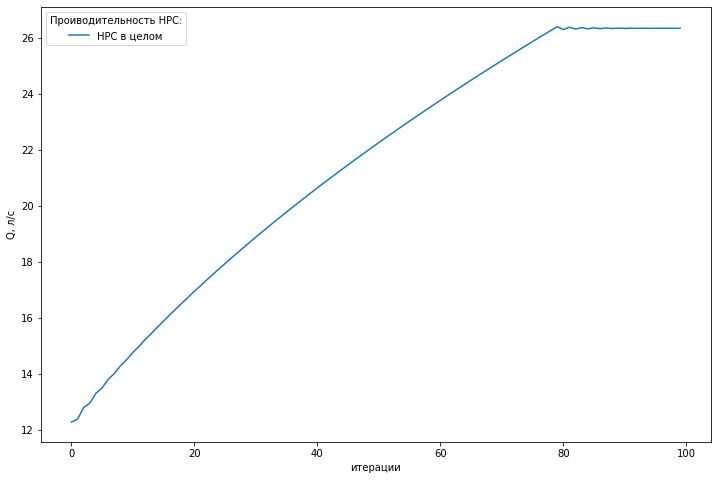

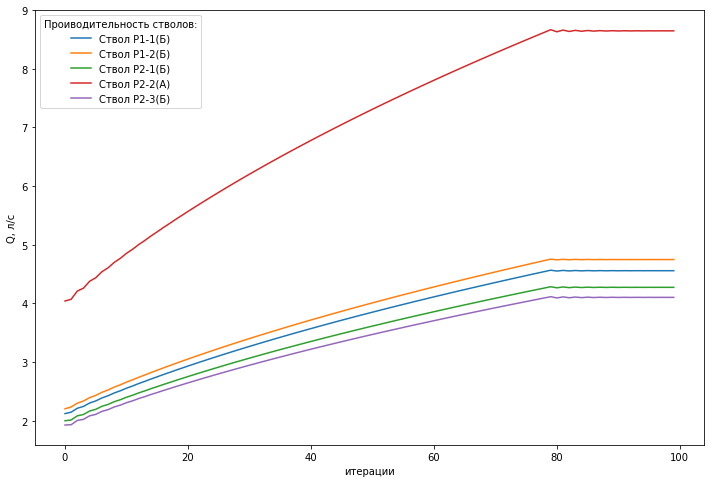

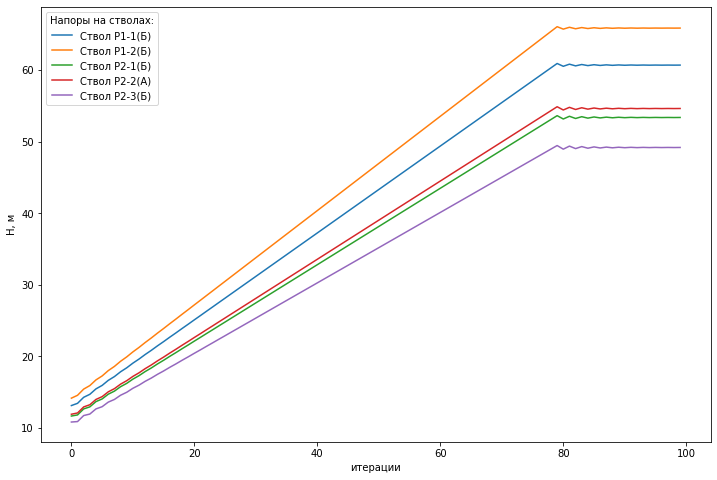

In [10]:
# Выводим итоговые графики:
# Расход всей системы
plt.figure(figsize=(12, 8))
plt.plot(pump.history()['q'], label='НРС в целом')

plt.legend(title='Проиводительность НРС:')
plt.xlabel('итерации')
plt.ylabel('Q, л/с')
plt.show()

# Напоры и расходы на стволах
plt.figure(figsize=(12, 8))
plt.plot(nozzle_11.history()['q'], label=nozzle_11.name)
plt.plot(nozzle_12.history()['q'], label=nozzle_12.name)
plt.plot(nozzle_21.history()['q'], label=nozzle_21.name)
plt.plot(nozzle_22.history()['q'], label=nozzle_22.name)
plt.plot(nozzle_23.history()['q'], label=nozzle_23.name)

plt.legend(title='Проиводительность стволов:')
plt.xlabel('итерации')
plt.ylabel('Q, л/с')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(nozzle_11.history()['H_in'], label=nozzle_11.name)
plt.plot(nozzle_12.history()['H_in'], label=nozzle_12.name)
plt.plot(nozzle_21.history()['H_in'], label=nozzle_21.name)
plt.plot(nozzle_22.history()['H_in'], label=nozzle_22.name)
plt.plot(nozzle_23.history()['H_in'], label=nozzle_23.name)

plt.legend(title='Напоры на стволах:')
plt.xlabel('итерации')
plt.ylabel('Н, м')
plt.show()

In [11]:
pressures

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80]